# WordCloud Graphs of Reviews

## Get Reviews Text

In [19]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [37]:
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import pyodbc
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Database connection parameters
driver = os.getenv('driver')
server = os.getenv('server')
database = os.getenv('database')
username = os.getenv('username')
password = os.getenv('password')

connection_string = (
    f'Driver={driver};'
    f'Server={server};'
    f'Database={database};'
    f'Uid={username};'
    f'Pwd={password};'
    'Encrypt=yes;'
    'TrustServerCertificate=no;'
    'Connection Timeout=30;'
)

In [38]:
# Connect to the database
try:
    conn = pyodbc.connect(connection_string, autocommit=True)
    print("Connected to Azure SQL Database successfully.")

except Exception as e:
    print("Error connecting to database:", e)

Connected to Azure SQL Database successfully.


In [39]:
# Review types and marketplaces
review_types = ['Positive', 'Negative', 'Neutral']
searching_marketplaces = ['EBAY_IE', 'EBAY_US']

In [40]:
def get_reviews_text(marketplace, review_type):
    sql_query = f"""
        SELECT 
            [dbo].[reviews].review_text
        FROM [dbo].[reviews]
        JOIN [dbo].[items]
        ON [dbo].[reviews].item_id = [dbo].[items].item_id
        WHERE [dbo].[items].searching_marketplace = '{marketplace}'
        AND [dbo].[reviews].review_type = '{review_type}'
    """

    df = pd.read_sql(sql_query, conn)
    text = df['review_text'].str.cat(sep=' ')   
    return text



In [41]:
ie_pos = get_reviews_text('EBAY_IE', 'Positive')
ie_neg = get_reviews_text('EBAY_IE', 'Negative')
ie_neu = get_reviews_text('EBAY_IE', 'Neutral')

us_pos = get_reviews_text('EBAY_US', 'Positive')
us_neg = get_reviews_text('EBAY_US', 'Negative')
us_neu = get_reviews_text('EBAY_US', 'Neutral')

conn.close()

C:\Users\micro\AppData\Local\Temp\ipykernel_13444\1550031236.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


## Drawing WordCloud

### Ireland - Positive

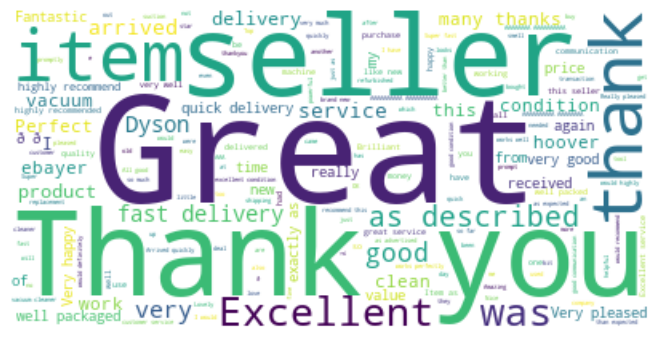

In [51]:
# Define custom stopwords
custom_stopwords = set(["the", "and", "that", "but", "is", "it", "for", "in", "on", "to", "a", "with"])

# Generate the word cloud with additional stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(ie_pos)

# Plot the wordcloud
# plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout(pad=0)  # Remove extra padding around the graph
plt.savefig("ie_positive.png")
plt.show()

### Ireland - Negative

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


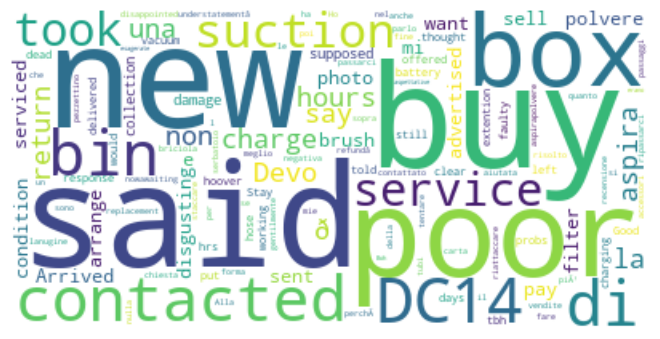

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))

#  "seller", "Dyson", "item"
# Define custom stopwords if needed
custom_stopwords = nltk_stopwords.union({"the", "and", "that", "but", "seller", "item", })  # Add any extra words you want to ignore

# Generate the word cloud with the combined stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(ie_neg)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)  # Remove extra padding around the graph
plt.savefig("ie_negative.png")
plt.show()


### Ireland - Neutral

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


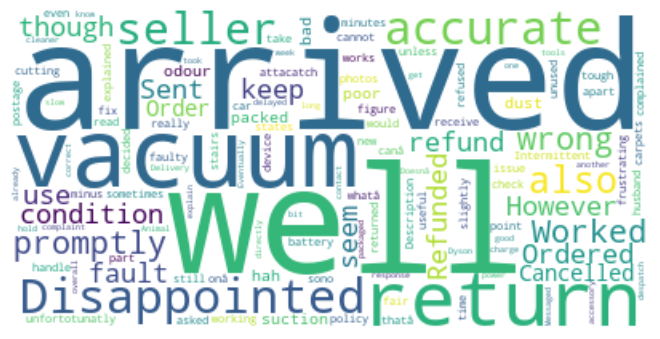

In [61]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))

# Define custom stopwords if needed
custom_stopwords = nltk_stopwords.union({"the", "and", "that", "item"})  # Add any extra words you want to ignore

# Generate the word cloud with the combined stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(ie_neu)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)  # Remove extra padding around the graph
plt.savefig("ie_neutral.png")
plt.show()

### United States - Positive

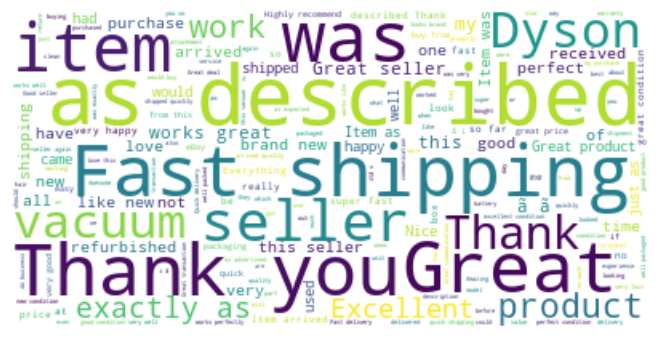

In [56]:
# Define custom stopwords
custom_stopwords = set(["the", "and", "that", "but", "is", "it", "for", "in", "on", "to", "a", "with", "I"])

# Generate the word cloud with additional stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(us_pos)

# Plot the wordcloud
# plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout(pad=0)  # Remove extra padding around the graph
plt.savefig("us_positive.png")
plt.show()

### United States - Negative

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


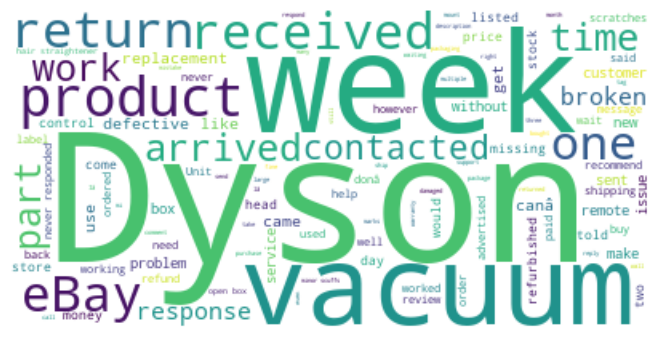

In [57]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))

#  "seller", "Dyson", "item"
# Define custom stopwords if needed
custom_stopwords = nltk_stopwords.union({"the", "and", "that", "but", "seller", "item"})  # Add any extra words you want to ignore

# Generate the word cloud with the combined stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(us_neg)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)  # Remove extra padding around the graph
plt.savefig("us_negative.png")
plt.show()


### United States - Neutral

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


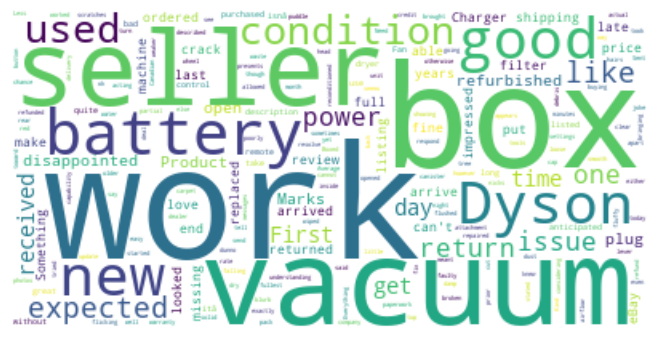

In [62]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))

# Define custom stopwords if needed
custom_stopwords = nltk_stopwords.union({"the", "and", "that", "item"})  # Add any extra words you want to ignore

# Generate the word cloud with the combined stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(us_neu)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)  # Remove extra padding around the graph
plt.savefig("us_neutral.png")
plt.show()